In [1]:
%load_ext autoreload
%autoreload 2
from lens_simulation.Lens import Lens, LensType
from lens_simulation.Medium import Medium, LithiumNiabate

from lens_simulation.structures import SimulationOptions, SimulationParameters
from lens_simulation import utils
import matplotlib.pyplot as plt

import numpy as np


In [2]:
# create lens
parameters = SimulationParameters(
    A=10000,
    pixel_size=1e-6,
    sim_height=1000e-6,
    sim_width=1000e-6,
    sim_wavelength=488e-9,
    lens_type=LensType.Spherical,
)



lens:  (501, 501)


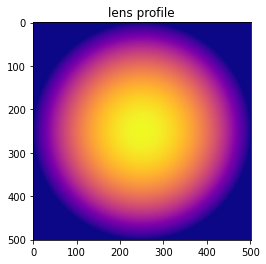

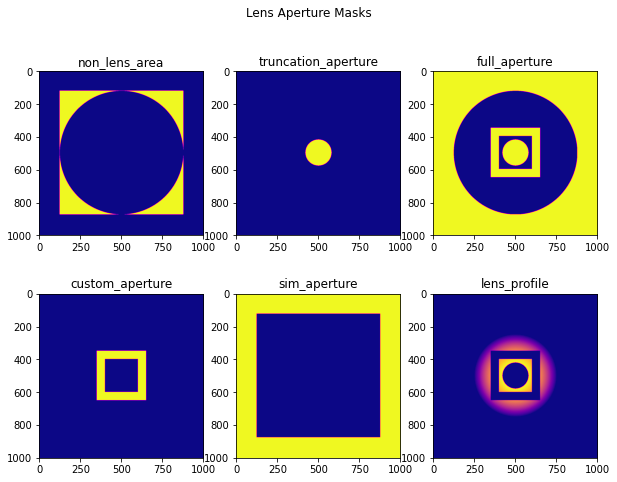

In [7]:

from lens_simulation.Lens import test_escape_path_fits_inside_simulation
from lens_simulation.Simulation import pad_simulation

ep = 0.5
parameters.lens_type = LensType.Cylindrical
parameters.lens_type = LensType.Spherical

lens = Lens(500e-6, 50e-6, 2.0, LithiumNiabate())
lens.generate_profile(parameters.pixel_size, parameters.lens_type, length=200e-6)

print("lens: ", lens.profile.shape)
plt.imshow(lens.profile, cmap="plasma")
plt.title("lens profile")
plt.show()

# aperture
lens.calculate_aperture(100e-6, 150e-6, type="square", inverted=False)

# truncation
lens.calculate_truncation_mask(truncation_height=45e-6, aperture=True)

# escape path
lens.create_escape_path(parameters, ep)

# pad simulation
lens = pad_simulation(lens, parameters)

# apply all mask
lens.apply_aperture_masks()

fig = utils.plot_apeture_masks(lens)
plt.show()

# TODO: add escape path to config


In [4]:
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.1)
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.5)
test_escape_path_fits_inside_simulation(lens, parameters, ep=1.5)


ValueError: The given escape path is outside the simulation size: ep: 1101px, sim: 1001px